## CMPINF 0010 Final Project Notebook

https://data.wprdc.org/dataset/shape-files-for-bikepgh-s-pittsburgh-bike-map

### Intro:

Our project is going to be covering the best neighborhoods to live in Pittsburgh. I came up with this metric because my group members and myself ride our bikes not only around campus, but throughout the city.

### My Metric:

My metric will be covering where there are bike trails, bridges, lanes, routes, etc. are throughout the city of Pittsburgh. The dataset I am using is titled "BikePGH's Pittsburgh Bike Map Geographic Data" and this dataset includes:
* Bike lanes
* Bike trails
* Bridges
* Bike routes

In [55]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

#### A list of bike accessible paths, lanes, etc. In Pittsburgh

In [56]:
bikes = pd.read_csv("bike_pavement_markings.csv") 
bikes.head(67)

,Project ID,Year Added,Street,Cross Streets,Type,Protected Bike Lane,Street Distance (Miles),Bike Lane Distance (Miles),Shared Lane Marking Distance (Miles),Removed bike lane,Removed sharrow,Unnamed: 11,Unnamed: 12,Neighborhood
0,1,1980,Resevoir Dr,Loop,Bike Lane,NaN,1.10,1.10,NaN,NaN,NaN,NaN,NaN,Highland Park
1,2,1980,Riverview Dr,Loop,Bike Lane,NaN,2.15,2.15,NaN,NaN,NaN,NaN,NaN,Perry North
2,3,1983,Beechwood Ave,Fifth Ave/Saline St,Bike Lane,NaN,3.71,7.42,NaN,NaN,NaN,NaN,NaN,Squirrel Hill North
3,4,2007,Liberty Ave,Ligonier St/Baum Blvd,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,Lower Lawrenceville
4,5,2007,Birmingham Bridge,E Carson St/Fifth/Forbes,Bike Lane,NaN,0.60,1.20,NaN,NaN,NaN,NaN,NaN,Southside
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,36,2015,Bigelow,O'Hara to Schenley,NaN,NaN,0.20,0.40,NaN,NaN,NaN,NaN,NaN,Central Oakland
62,37,2015,O'Hara Bigelow Bayard,DeSoto to Morewood,Bl/SH,NaN,1.10,1.60,0.6,NaN,NaN,NaN,NaN,Central Oakland
63,38,2015,Schenley Drive,Schenley Drive Extension to Bigelow,Protected,x,0.20,0.40,NaN,NaN,NaN,NaN,NaN,Central Oakland
64,37,2015,East Street,Lareda street to Suffolk,Bike Lane,NaN,0.50,1.00,NaN,NaN,NaN,NaN,NaN,Spring Hill - City View


#### The trail length per neighborhood

In [57]:
bikes = pd.read_csv("bike_pavement_markings.csv") 
bike_distance = bikes.groupby("Neighborhood").sum()['Bike Lane Distance (Miles)']
bike_distance.sort_values(ascending=False)

Neighborhood
Squirrel Hill North        10.36
Central Oakland             6.11
Allegheny Center            3.40
Lower Lawrenceville         3.40
Perry North                 2.55
Southside                   2.30
Downtown                    1.90
East Liberty                1.85
Larimer                     1.80
Greenfield                  1.16
Highland Park               1.10
Point Breeze North          1.00
Spring Hill - City View     1.00
Bloomfield                  0.80
Point Breeze                0.52
Upper Lawrenceville         0.50
North Shore                 0.38
Polish Hill                 0.30
North Oakland               0.23
Shadyside                   0.00
Homewood West               0.00
Fineview                    0.00
Strip District              0.00
Troy Hill                   0.00
Name: Bike Lane Distance (Miles), dtype: float64

#### Bar graph of the length of of each bike trail, lanes, path in Pittsburgh per Neighborhood

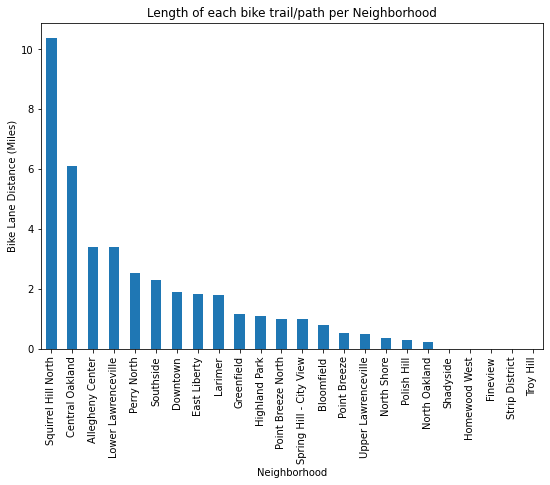

In [62]:
count = bikes["Neighborhood"].value_counts()
bike_distance = bikes.groupby("Neighborhood").sum()['Bike Lane Distance (Miles)']
bike_distance = bike_distance.sort_values(ascending=False)
bike_distance.plot(kind='bar',
                  ylabel = 'Bike Lane Distance (Miles)',
                  figsize=(9,6),
                  title = "Length of each bike trail, lanes, path per Neighborhood")

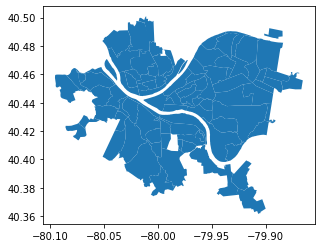

In [47]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

#### Displays where the longest bike trails, paths, and lanes are in Pittsburgh per neighborhood

* Squirrel Hill North
* Central Oakland
* Allegheny Center
* Lower Lawrenceville

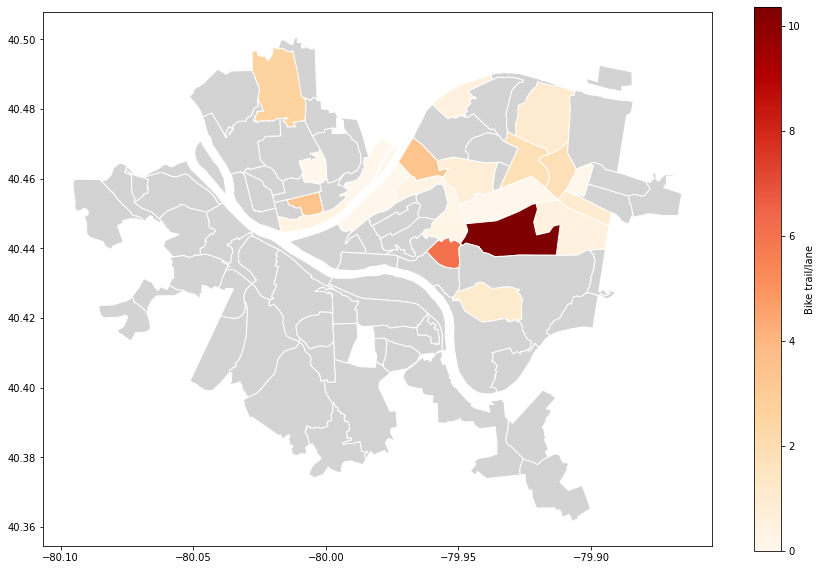

In [48]:
bike_map = neighborhoods.merge(bike_distance, how='left', left_on='hood', right_on='Neighborhood')
bike_map.plot(column = "Bike Lane Distance (Miles)", 
               cmap='OrRd',              
               edgecolor="white",       
               legend=True,        
               legend_kwds={'label': "Bike trail/lane"},
               figsize=(15, 10),     
               missing_kwds={"color": "lightgrey"}) 

In conclusion, Squirrel Hill North is the best place in Pittsburgh to be a biker due to the longer bike trails, lanes, and paths. Squirrel Hill North has a total length for its bike lanes, paths, and trails of 10.36 miles. Central Oakland was the runner-up for this top spot with a total length of 6.11 miles. Tied for third were Lower Lawrenceville and Allegheny Center with a total length of 3.40 miles.